# Installation and Environment set up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd #clear prompt before exceute
!wget https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

/content
--2023-11-27 06:22:08--  https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388341449 (370M) [application/x-gzip]
Saving to: ‘spark-3.4.1-bin-hadoop3.tgz’

spark-3.4.1-bin-had 100%[===================>] 370.35M   112MB/s    in 3.2s    

2023-11-27 06:22:12 (114 MB/s) - ‘spark-3.4.1-bin-hadoop3.tgz’ saved [388341449/388341449]



In [ ]:
%%capture
!tar xvzf spark-3.4.1-bin-hadoop3.tgz

In [ ]:
%%capture
!pip install findspark

In [ ]:
import os
os.environ['Spark_Home'] = "/content/spark-3.4.1-bin-hadoop3"

import findspark
findspark.init

<function findspark.init(spark_home=None, python_path=None, edit_rc=False, edit_profile=False)>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=5a2e4f4d5cde8d87d383cf71cf5876182d7f9a063e636792a3420de0f8d386ba
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark 3.4 on google.colab").getOrCreate()

In [ ]:
url = "/content/drive/MyDrive/BigData/smoking_driking_dataset_Ver01.csv"
df = spark.read.csv(url,header=True,inferSchema=True)
df.show()

+------+---+------+------+---------+----------+-----------+---------+----------+-----+-----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+
|   sex|age|height|weight|waistline|sight_left|sight_right|hear_left|hear_right|  SBP|  DBP| BLDS|tot_chole|HDL_chole|LDL_chole|triglyceride|hemoglobin|urine_protein|serum_creatinine|SGOT_AST|SGOT_ALT|gamma_GTP|SMK_stat_type_cd|DRK_YN|
+------+---+------+------+---------+----------+-----------+---------+----------+-----+-----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+
|  Male| 35|   170|    75|     90.0|       1.0|        1.0|      1.0|       1.0|120.0| 80.0| 99.0|    193.0|     48.0|    126.0|        92.0|      17.1|          1.0|             1.0|    21.0|    35.0|     40.0|             1.0|     Y|
|  Male| 30|   180|    80|     89.0|       0.9|        1

#Data Preprocessing

In [ ]:
from pyspark.sql.functions import *
print(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show())

+---+---+------+------+---------+----------+-----------+---------+----------+---+---+----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+
|sex|age|height|weight|waistline|sight_left|sight_right|hear_left|hear_right|SBP|DBP|BLDS|tot_chole|HDL_chole|LDL_chole|triglyceride|hemoglobin|urine_protein|serum_creatinine|SGOT_AST|SGOT_ALT|gamma_GTP|SMK_stat_type_cd|DRK_YN|
+---+---+------+------+---------+----------+-----------+---------+----------+---+---+----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+
|  0|  0|     0|     0|        0|         0|          0|        0|         0|  0|  0|   0|        0|        0|        0|           0|         0|            0|               0|       0|       0|        0|               0|     0|
+---+---+------+------+---------+----------+-----------+---------+----------+---+---+---

In [ ]:
df.printSchema()

root
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- waistline: double (nullable = true)
 |-- sight_left: double (nullable = true)
 |-- sight_right: double (nullable = true)
 |-- hear_left: double (nullable = true)
 |-- hear_right: double (nullable = true)
 |-- SBP: double (nullable = true)
 |-- DBP: double (nullable = true)
 |-- BLDS: double (nullable = true)
 |-- tot_chole: double (nullable = true)
 |-- HDL_chole: double (nullable = true)
 |-- LDL_chole: double (nullable = true)
 |-- triglyceride: double (nullable = true)
 |-- hemoglobin: double (nullable = true)
 |-- urine_protein: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- SGOT_AST: double (nullable = true)
 |-- SGOT_ALT: double (nullable = true)
 |-- gamma_GTP: double (nullable = true)
 |-- SMK_stat_type_cd: double (nullable = true)
 |-- DRK_YN: string (nullable = true)



In [ ]:
print("number of rows: ",df.count())

number of rows:  991346


In [ ]:
from pyspark.sql.functions import col

def countNulls(column):
  d = {}
  for co in column:
   d[co] = df.filter(col(co).isNull()).count()

  return d

In [ ]:
allNull = countNulls(df.columns)
allNull

{'sex': 0,
 'age': 0,
 'height': 0,
 'weight': 0,
 'waistline': 0,
 'sight_left': 0,
 'sight_right': 0,
 'hear_left': 0,
 'hear_right': 0,
 'SBP': 0,
 'DBP': 0,
 'BLDS': 0,
 'tot_chole': 0,
 'HDL_chole': 0,
 'LDL_chole': 0,
 'triglyceride': 0,
 'hemoglobin': 0,
 'urine_protein': 0,
 'serum_creatinine': 0,
 'SGOT_AST': 0,
 'SGOT_ALT': 0,
 'gamma_GTP': 0,
 'SMK_stat_type_cd': 0,
 'DRK_YN': 0}

In [ ]:
df = df.na.drop()

In [ ]:
print("number of rows: ",df.count())

number of rows:  991346


In [ ]:
from pyspark.sql.functions import col, count
df.groupBy("SMK_stat_type_cd").agg(count('SMK_stat_type_cd')).show()

+----------------+-----------------------+
|SMK_stat_type_cd|count(SMK_stat_type_cd)|
+----------------+-----------------------+
|             1.0|                 602441|
|             3.0|                 213954|
|             2.0|                 174951|
+----------------+-----------------------+



In [ ]:
from pyspark.sql.functions import col

casting = ['age','height','weight']
for cols in df.columns:
  if cols in casting:
    #print(cols,col(cols))
    df = df.withColumn(cols, df[cols].cast("Double"))

In [ ]:
df.drop("DRK_YN").printSchema()

root
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- waistline: double (nullable = true)
 |-- sight_left: double (nullable = true)
 |-- sight_right: double (nullable = true)
 |-- hear_left: double (nullable = true)
 |-- hear_right: double (nullable = true)
 |-- SBP: double (nullable = true)
 |-- DBP: double (nullable = true)
 |-- BLDS: double (nullable = true)
 |-- tot_chole: double (nullable = true)
 |-- HDL_chole: double (nullable = true)
 |-- LDL_chole: double (nullable = true)
 |-- triglyceride: double (nullable = true)
 |-- hemoglobin: double (nullable = true)
 |-- urine_protein: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- SGOT_AST: double (nullable = true)
 |-- SGOT_ALT: double (nullable = true)
 |-- gamma_GTP: double (nullable = true)
 |-- SMK_stat_type_cd: double (nullable = true)



#Z-score Outlier removal

In [ ]:
from pyspark.sql.functions import countDistinct, avg, stddev
column_subset = ['age','weight','height','waistline','sight_left','sight_right','SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']
for cols in column_subset:
          mean = df.agg({cols:'mean'}).collect()[0][0]
          stddev = df.agg({cols:'stddev'}).collect()[0][0]
          upper_limit = mean + (3*stddev)
          lower_limit = mean - (3*stddev)
          df = df.filter((df[cols]>lower_limit) & (df[cols]<upper_limit))
df.show()

+------+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+
|   sex| age|height|weight|waistline|sight_left|sight_right|hear_left|hear_right|  SBP| DBP| BLDS|tot_chole|HDL_chole|LDL_chole|triglyceride|hemoglobin|urine_protein|serum_creatinine|SGOT_AST|SGOT_ALT|gamma_GTP|SMK_stat_type_cd|DRK_YN|
+------+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+
|  Male|35.0| 170.0|  75.0|     90.0|       1.0|        1.0|      1.0|       1.0|120.0|80.0| 99.0|    193.0|     48.0|    126.0|        92.0|      17.1|          1.0|             1.0|    21.0|    35.0|     40.0|             1.0|     Y|
|  Male|50.0| 165.0|  60.0|     80.0|       1.0|        

In [ ]:
print("number of rows: ",df.count())

number of rows:  586028


In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="sex", outputCol="sex_index")
indexd_data=indexer.fit(df).transform(df)
indexd_data.show(10, truncate=False)

+------+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+---------+
|sex   |age |height|weight|waistline|sight_left|sight_right|hear_left|hear_right|SBP  |DBP |BLDS |tot_chole|HDL_chole|LDL_chole|triglyceride|hemoglobin|urine_protein|serum_creatinine|SGOT_AST|SGOT_ALT|gamma_GTP|SMK_stat_type_cd|DRK_YN|sex_index|
+------+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+------+---------+
|Male  |35.0|170.0 |75.0  |90.0     |1.0       |1.0        |1.0      |1.0       |120.0|80.0|99.0 |193.0    |48.0     |126.0    |92.0        |17.1      |1.0          |1.0             |21.0    |35.0    |40.0     |1.0             |Y     |1.0      |
|Male  |40.0|165

In [ ]:
indexd_data = indexd_data.drop("sex","DRK_YN")
indexd_data.printSchema()

root
 |-- age: double (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- waistline: double (nullable = true)
 |-- sight_left: double (nullable = true)
 |-- sight_right: double (nullable = true)
 |-- hear_left: double (nullable = true)
 |-- hear_right: double (nullable = true)
 |-- SBP: double (nullable = true)
 |-- DBP: double (nullable = true)
 |-- BLDS: double (nullable = true)
 |-- tot_chole: double (nullable = true)
 |-- HDL_chole: double (nullable = true)
 |-- LDL_chole: double (nullable = true)
 |-- triglyceride: double (nullable = true)
 |-- hemoglobin: double (nullable = true)
 |-- urine_protein: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- SGOT_AST: double (nullable = true)
 |-- SGOT_ALT: double (nullable = true)
 |-- gamma_GTP: double (nullable = true)
 |-- SMK_stat_type_cd: double (nullable = true)
 |-- sex_index: double (nullable = false)



In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(
    inputCols = indexd_data.columns,
    outputCol = "features"
)
output = assembler.transform(indexd_data)
output.show(10, truncate=False)

+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+---------+------------------------------------------------------------------------------------------------------------------+
|age |height|weight|waistline|sight_left|sight_right|hear_left|hear_right|SBP  |DBP |BLDS |tot_chole|HDL_chole|LDL_chole|triglyceride|hemoglobin|urine_protein|serum_creatinine|SGOT_AST|SGOT_ALT|gamma_GTP|SMK_stat_type_cd|sex_index|features                                                                                                          |
+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+---------+---------------------------------------------------------------------------

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

#selected_columns = [col for col in indexd_data.columns if col!="SMK_stat_type_cd"]
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

scaler_model = scaler.fit(output)
normalized_data = scaler_model.transform(output)
normalized_data.show()

+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+---------+--------------------+--------------------+
| age|height|weight|waistline|sight_left|sight_right|hear_left|hear_right|  SBP| DBP| BLDS|tot_chole|HDL_chole|LDL_chole|triglyceride|hemoglobin|urine_protein|serum_creatinine|SGOT_AST|SGOT_ALT|gamma_GTP|SMK_stat_type_cd|sex_index|            features|     scaled_features|
+----+------+------+---------+----------+-----------+---------+----------+-----+----+-----+---------+---------+---------+------------+----------+-------------+----------------+--------+--------+---------+----------------+---------+--------------------+--------------------+
|35.0| 170.0|  75.0|     90.0|       1.0|        1.0|      1.0|       1.0|120.0|80.0| 99.0|    193.0|     48.0|    126.0|        92.0|      17.1|          1.0|             1.0|  

In [ ]:
finalData = normalized_data.select("scaled_features","SMK_stat_type_cd")
finalData.show()

+--------------------+----------------+
|     scaled_features|SMK_stat_type_cd|
+--------------------+----------------+
|[0.27272727272727...|             1.0|
|[0.36363636363636...|             1.0|
|[0.54545454545454...|             1.0|
|[0.54545454545454...|             3.0|
|[0.45454545454545...|             1.0|
|[0.27272727272727...|             3.0|
|[0.63636363636363...|             1.0|
|[0.45454545454545...|             1.0|
|[0.63636363636363...|             1.0|
|[0.18181818181818...|             1.0|
|[0.18181818181818...|             1.0|
|[0.09090909090909...|             1.0|
|[0.09090909090909...|             1.0|
|[0.54545454545454...|             1.0|
|[0.72727272727272...|             3.0|
|[0.27272727272727...|             1.0|
|[0.09090909090909...|             3.0|
|[0.36363636363636...|             2.0|
|[0.0,0.5,0.333333...|             1.0|
|[0.72727272727272...|             3.0|
+--------------------+----------------+
only showing top 20 rows



In [ ]:
train_ratio = 0.8
test_ratio = 1 - train_ratio
train_data, test_data = finalData.randomSplit([train_ratio, test_ratio])

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="scaled_features", labelCol="SMK_stat_type_cd")
model = lr.fit(train_data)

In [ ]:
predictions = model.transform(test_data)
predictions.show(5)

+--------------------+----------------+--------------------+--------------------+----------+
|     scaled_features|SMK_stat_type_cd|       rawPrediction|         probability|prediction|
+--------------------+----------------+--------------------+--------------------+----------+
|(23,[0,3,8,9,10,1...|             1.0|[-8.7977771478300...|[2.69227833252625...|       1.0|
|(23,[3,4,5,9,10,1...|             1.0|[-8.7947454402434...|[1.19417639543034...|       1.0|
|[0.0,0.0,0.111111...|             1.0|[-8.7959262753845...|[1.00844490775487...|       1.0|
|[0.0,0.0,0.111111...|             3.0|[-8.8002283139318...|[2.70919782160049...|       3.0|
|[0.0,0.0,0.111111...|             1.0|[-8.7990034898125...|[8.03735164721840...|       1.0|
+--------------------+----------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='SMK_stat_type_cd')
auc = evaluator.evaluate(predictions)
print("Logistic regression accuracy:", auc)

Logistic regression accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


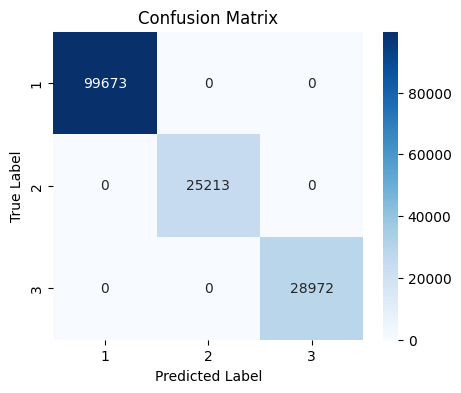

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.mllib.evaluation import MulticlassMetrics

predictionAndLabels = predictions.select("prediction", "SMK_stat_type_cd").rdd

metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol="scaled_features", labelCol='SMK_stat_type_cd',numTrees=200)
model = rf.fit(train_data)

In [ ]:
predictions = model.transform(test_data)
predictions.show(5)

+--------------------+----------------+--------------------+--------------------+----------+
|     scaled_features|SMK_stat_type_cd|       rawPrediction|         probability|prediction|
+--------------------+----------------+--------------------+--------------------+----------+
|[0.0,0.2,0.071428...|             1.0|[0.0,195.19675422...|[0.0,0.9759837711...|       1.0|
|[0.0,0.2,0.142857...|             1.0|[0.0,195.48278640...|[0.0,0.9774139320...|       1.0|
|[0.0,0.2,0.142857...|             1.0|[0.0,195.04771786...|[0.0,0.9752385893...|       1.0|
|[0.0,0.2,0.214285...|             1.0|[0.0,194.94535775...|[0.0,0.9747267887...|       1.0|
|[0.0,0.2,0.214285...|             1.0|[0.0,195.16186148...|[0.0,0.9758093074...|       1.0|
+--------------------+----------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='SMK_stat_type_cd',predictionCol='prediction', metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Display the accuracy
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 1.0


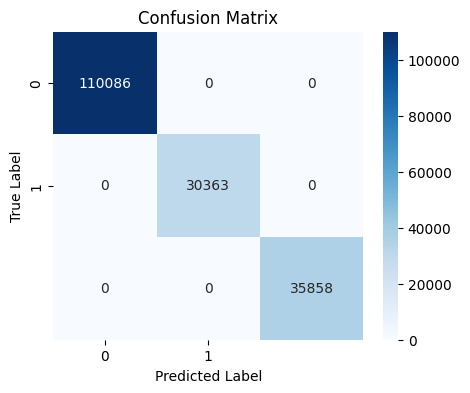

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.mllib.evaluation import MulticlassMetrics

predictionAndLabels = predictions.select("prediction", "SMK_stat_type_cd").rdd

metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol="scaled_features", labelCol='SMK_stat_type_cd',maxDepth=5)
model = dt.fit(train_data)


In [ ]:
predictions = model.transform(test_data)
predictions.show(5)

+--------------------+----------------+--------------------+-----------------+----------+
|     scaled_features|SMK_stat_type_cd|       rawPrediction|      probability|prediction|
+--------------------+----------------+--------------------+-----------------+----------+
|[0.0,0.2,0.071428...|             1.0|[0.0,439770.0,0.0...|[0.0,1.0,0.0,0.0]|       1.0|
|[0.0,0.2,0.142857...|             1.0|[0.0,439770.0,0.0...|[0.0,1.0,0.0,0.0]|       1.0|
|[0.0,0.2,0.142857...|             1.0|[0.0,439770.0,0.0...|[0.0,1.0,0.0,0.0]|       1.0|
|[0.0,0.2,0.214285...|             1.0|[0.0,439770.0,0.0...|[0.0,1.0,0.0,0.0]|       1.0|
|[0.0,0.2,0.214285...|             1.0|[0.0,439770.0,0.0...|[0.0,1.0,0.0,0.0]|       1.0|
+--------------------+----------------+--------------------+-----------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='SMK_stat_type_cd',predictionCol='prediction', metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Display the accuracy
print("Decision tree Accuracy:", accuracy)

Decision tree Accuracy: 1.0


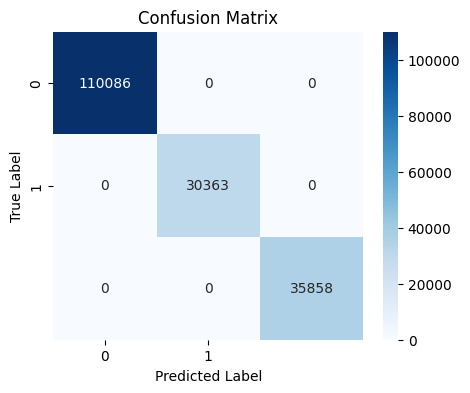

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.mllib.evaluation import MulticlassMetrics

predictionAndLabels = predictions.select("prediction", "SMK_stat_type_cd").rdd

metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()